# Titanic Project 

## Some basic libraries!

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

# The Data 
* The 'train' dataset is used to train and test our model accuarcy.
* The 'test' dataset is used to predict and submit for evaluation.

In [2]:
train = df = pd.read_csv('../input/titanic/train.csv')
test = df = pd.read_csv('../input/titanic/test.csv')
acc_test = pd.read_csv('../input/titanic/gender_submission.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## The description of each column

* Survival: Survival              |	0 = No, 1 = Yes
* Pclass: Ticket class          | 	1 = 1st, 2 = 2nd, 3 = 3rd
* Sex: Sex                   	
* Age: Age in years          	
* Sibsp: # of siblings / spouses aboard the Titanic 	
* Parch: # of parents / children aboard the Titanic 	
* Ticket: Ticket number         	
* Fare: Passenger fare        
* Cabin: Cabin number        
* Embarked: Port of Embarkation   | C = Cherbourg, Q = Queenstown, S = Southampton

## Let's see what data we're missing here.

In [3]:
print("             Sum of NaN")
train.isnull().sum()

             Sum of NaN


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Action:
* Let's first drop our two rows with NaN in our 'Embarked' column. It's only two rows so that won't hurt us.
* Then we're going to fill our 'Age' column values that has 'NaN' with the Age mean value using SimpleImputer.

In [4]:
train.dropna(inplace=True,axis=0,subset=['Embarked'])
test.dropna(inplace=True,axis=0,subset=['Embarked'])

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
train[['Age']] = imputer.fit_transform(train[['Age']])
test[['Age','Fare']] = imputer.fit_transform(test[['Age','Fare']])

print("             Sum of NaN")
train.isnull().sum()

             Sum of NaN


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Much better.. and we're not using 'Cabin' here because the data column is almost all empty.

# Feature Engineering

* Let's add **Title**, & **Family_Size.**

In [6]:
def variables(df):
    df['Title'] = df['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
    df.drop('Name', axis = 1 , inplace = True)
    df['Title'] = df['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')
    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
    df['Title'] = df['Title'].map({'NoTitle' : 0 , 'Miss': 1, 'Mrs' : 2,'Mr' :3 ,'Master' : 4})
variables(train)
variables(test)

In [7]:
# Columns we're keeping: Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_Size','Title']]
test = test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_Size','Title']]

In [8]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,0,3,male,22.0,1,0,7.2500,S,2,3
1,1,1,female,38.0,1,0,71.2833,C,2,2
2,1,3,female,26.0,0,0,7.9250,S,1,1
3,1,1,female,35.0,1,0,53.1000,S,2,2
4,0,3,male,35.0,0,0,8.0500,S,1,3


## Some Cool yet useful *Visuals*

[Text(0, 0, '161'),
 Text(0, 0, '89'),
 Text(0, 0, '59'),
 Text(0, 0, '21'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, ''),
 Text(0, 0, '')]

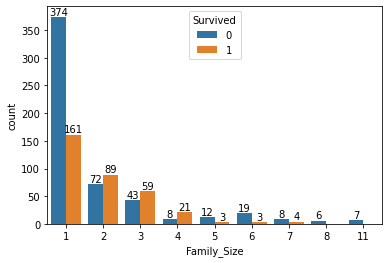

In [9]:
ax = sns.countplot(x='Family_Size', hue='Survived', data=train)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

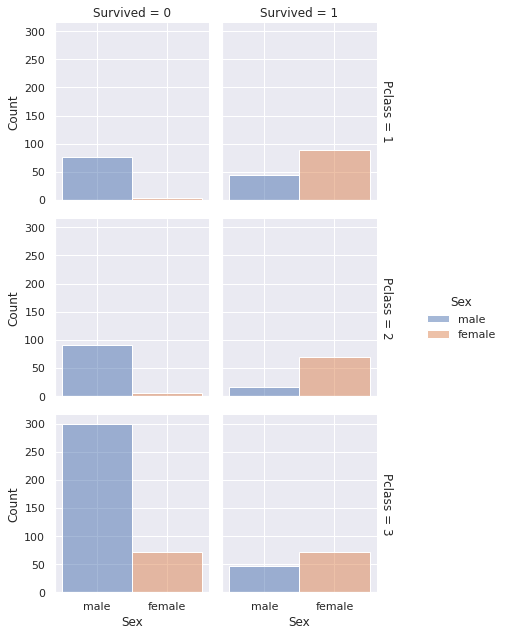

In [10]:
sns.set_theme(style="darkgrid")
disp = sns.displot(
    train, x="Sex", col="Survived", row="Pclass",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True),
    stat = "count",hue = "Sex"
);

## One-hot Encoding (PreProcessing)

* **numerical:** Age,Fare,SibSp,Parch 
* **nominal variables:** Sex,Embarked,Is_Married 
* **ordinal:** Pclass,Family_Size

Here we will transform the **nominal variables** into integers. Since these columns are not **ordinal**, we will turn them into matrices but we will drop the first column to lower the correlation.

* **Note1:** We can't say that Embarked Q > Embarked S therefore they must be transformed into matrices. On the other hand, Pclass 1 > Pclass 2.

* **Note2:** If using any other algorithm besides Decision Trees and Random Forests, you must **normalize** or **standarize** your values. I'll discuss this more in another notebook.

In [11]:
#Getdummies:
train = pd.get_dummies(train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_Size','Title']],drop_first=True)
test = pd.get_dummies(test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_Size','Title']],drop_first=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Title,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,3,1,0,1
1,1,1,38.0,1,0,71.2833,2,2,0,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,2,0,0,1
4,0,3,35.0,0,0,8.0500,1,3,1,0,1


# Data Split

* Here we use sklearn.model_selection to split our train/test data 70% / 30% respectively.

In [12]:
from sklearn.model_selection import train_test_split

X,y = train.iloc[:,1:].values, train.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.3,
                                                random_state=0,
                                                stratify=y)
X_sub = test.iloc[:,1:].values

# Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=6,
                            random_state=5)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("Accuracy score for Random Forest:",round(accuracy_score(y_test, pred_rf),4))

Accuracy score for Random Forest: 0.8689


In [14]:
sub_pred = rf.predict(X_sub)

sub= pd.DataFrame(test["PassengerId"])
sub["Survived"] = pd.DataFrame(sub_pred)
sub.fillna(0,inplace=True)
sub["Survived"] = sub["Survived"].astype(int)
submission = sub
submission.to_csv('submission.csv', index=False)